# Sizing Script for Low Voltage Current Mirror
Reference: Jespers, P., & Murmann, B. (2017). Systematic Design of Analog CMOS Circuits: Using Pre-Computed Lookup Tables. Cambridge University Press.

In [ ]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pygmid import Lookup as lk
import pandas as pd

In [3]:
nch = lk('../gmid_luts/nfet_01v8.mat')

gm_id1 = 13.3 #for moderate inversion
L1 = 2
Vgs1 = nch.look_upVGS(GM_ID = gm_id1, VSB = 0, L = L1)
Vgs1 = nch.look_upVGS(GM_ID = gm_id1, VDS = Vgs1, VSB = 0, L = L1)

print(f'(Vgs1) = {Vgs1}')

id_w1 = nch.look_up('ID_W', GM_ID = gm_id1, VDS = Vgs1, VSB = 0, L = L1)
Iin = 10e-6
W1 = Iin/id_w1
print(f'(W1) = {W1}')
print(f'(id_w1) = {id_w1}')
gm1 = Iin*id_w1
print(f'(gm1) = {gm1}')

(Vgs1) = 0.6933675463841236
(W1) = 7.86350259420385
(id_w1) = 1.2716979336117918e-06
(gm1) = 1.2716979336117919e-11


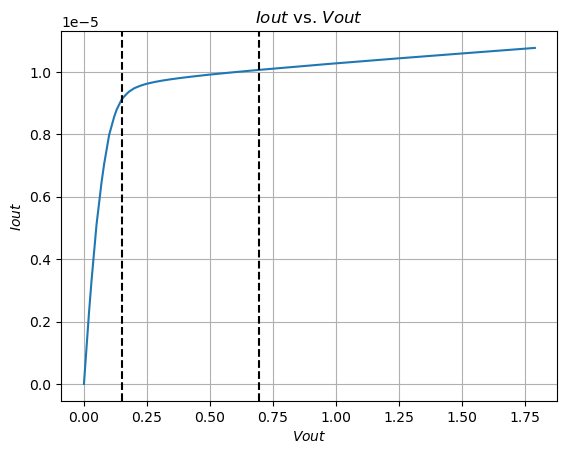

In [4]:
Vdsat1 = 2/gm_id1
Vds3_vec = [i/100 for i in range(0, 180, 1)]
Iout_vec = []
for Vds3 in Vds3_vec:
    id_w3 = nch.look_up('ID_W', VGS = Vgs1, L = L1, VDS = Vds3, VSB = 0)
    Id3 = np.multiply(id_w3,W1)
    Iout_vec.append(Id3)
plt.plot(Vds3_vec,Iout_vec)  
plt.grid(True)
plt.title('$Iout$ vs. $Vout$')
plt.xlabel('$Vout$')
plt.ylabel('$Iout$')
#plt.ylim(60, 80)
plt.axvline(x = Vdsat1, color = 'k', linestyle = '--')
plt.axvline(x = Vgs1, color = 'k', linestyle = '--')
plt.show()


In [5]:
gds_w1 = nch.look_up('GDS_W', VGS = Vgs1, VDS = Vgs1, VSB = 0, L = L1)
#gds1 = gm1/gm_gds1
VEA_1 = id_w1/gds_w1
#print(f'(gm_gds1) = {gm_gds1}')
print(f'(VEA_1) = {VEA_1}')
#print(f'(gds1) = {gds1}')

(VEA_1) = 13.777201219191351


(Vdsat1) = 0.15037593984962405


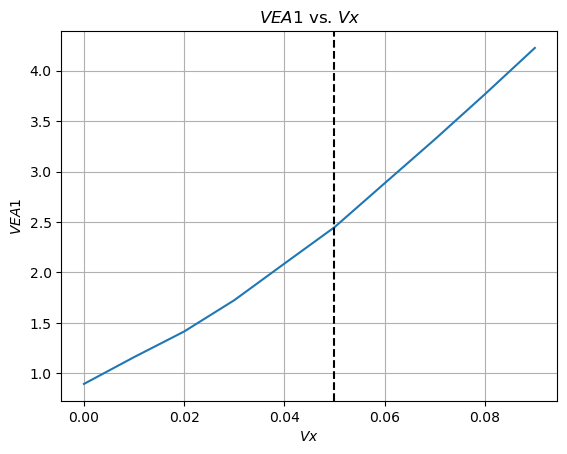

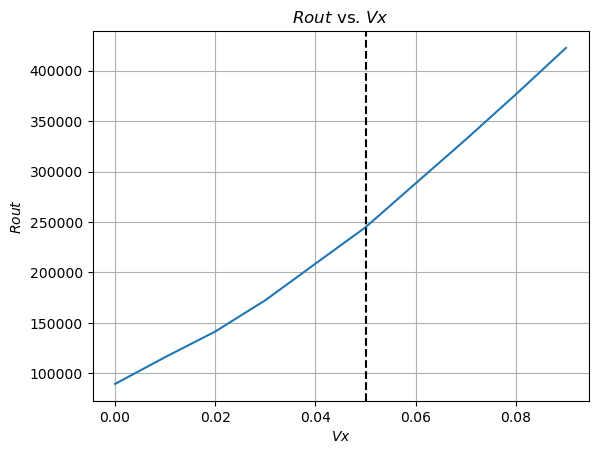

In [6]:
#Vds1 is made slightly higher tham Vdsat1
print(f'(Vdsat1) = {Vdsat1}')
Vx_vec = [i/100 for i in range(0, 10, 1)]
VEA1_vec = []
Rout_vec = []
for Vx in Vx_vec:
    Vds1 = Vdsat1 + Vx
    Vgs1 = nch.look_upVGS(GM_ID = gm_id1, VDS = Vds1, VSB = 0, L = L1)
    VEA1 = nch.lookup('ID_GDS', VGS = Vgs1, VDS = Vds1, L=L1, VSB = 0)
    VEA1_vec.append(VEA1)
    Rout = VEA1/Iin
    Rout_vec.append(Rout)
plt.plot(Vx_vec,VEA1_vec)  
plt.grid(True)
plt.title('$VEA1$ vs. $Vx$')
plt.xlabel('$Vx$')
plt.ylabel('$VEA1$')
plt.axvline(x = 0.05, color = 'k', linestyle = '--')
#plt.ylim(60, 80)
plt.show()
plt.plot(Vx_vec,Rout_vec)  
plt.grid(True)
plt.title('$Rout$ vs. $Vx$')
plt.xlabel('$Vx$')
plt.ylabel('$Rout$')
plt.axvline(x = 0.05, color = 'k', linestyle = '--')
plt.show()

In [7]:
Vds1 = Vdsat1 + 0.05

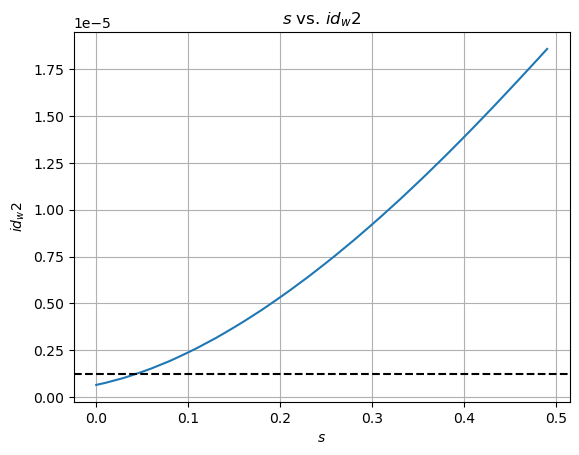

In [8]:
#sizing the cascode bias circuit
id_w1 = nch.look_up('ID_W', VGS = Vgs1, L = L1, VDS = Vds1, VSB = 0)
id_w2_vec = []
s_vec = [i/100 for i in range(0, 50, 1)]
for s in s_vec:
    id_w2 = nch.look_up('ID_W', VGS = Vgs1+s, L = L1, VDS = Vgs1-Vds1, VSB = Vds1)
    id_w2_vec.append(id_w2)
plt.plot(s_vec,id_w2_vec)  
plt.grid(True)
plt.title('$s$ vs. $id_w2$')
plt.xlabel('$s$')
plt.ylabel('$id_w2$')
plt.axhline(y = id_w1, color = 'k', linestyle = '--')
plt.show()

In [9]:
#finals dimensiona
Vgs2 = Vgs1 + 0.05
VBIAS = Vds1 + Vgs2
W = Iin/id_w1
print(f'(VBIAS) = {VBIAS}')
print(f'(W) = {W}')

(VBIAS) = 0.9438534996436565
(W) = 8.284634653785247


In [10]:
id_w7 = nch.look_up('ID_W', VGS = VBIAS, L = L1, VDS = Vds1, VSB = 0)
W_ = Iin/id_w7
print(f'(W_) = {W_}')

(W_) = 1.4202091279247888
